In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = pd.read_csv('Iris.csv')
del iris['Id']
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn import preprocessing

In [4]:
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [5]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
y = iris['Species']
X = iris.drop(columns='Species')

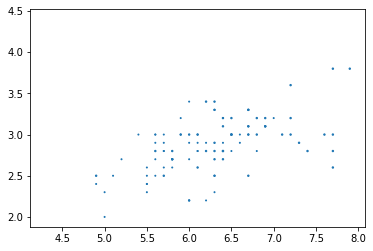

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],y)

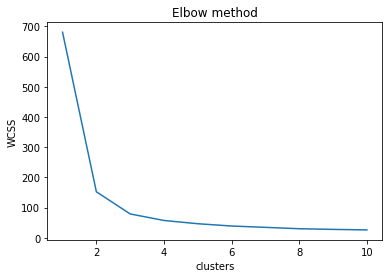

In [7]:
wcss = []

for i in range (1,11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
km = KMeans(n_clusters = 3)
km.fit(X)

new_labels = km.labels_

In [21]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor' , 'Iris-virginica']

y_true = y

y_pred = new_labels

print(classification_report(y_true, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.77      0.96      0.86        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.89       150
      macro avg       0.91      0.89      0.89       150
   weighted avg       0.91      0.89      0.89       150



In [22]:
counter = 0
for i in range(150):
    if y[i] == new_labels[i] :
        counter +=1
print('Overall Accuracy= %', counter*100 /150)

Overall Accuracy= % 89.33333333333333


In [11]:
from sklearn import metrics

In [12]:
print('Silhouette score =',metrics.silhouette_score(X, new_labels, metric='euclidean'))

Silhouette score = 0.5525919445499757


In [13]:
u , c = np.unique(new_labels, return_counts = True)

In [14]:
c

array([62, 50, 38], dtype=int64)

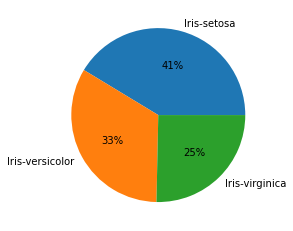

In [15]:
plt.pie(c , labels=target_names , autopct='%.i%%');

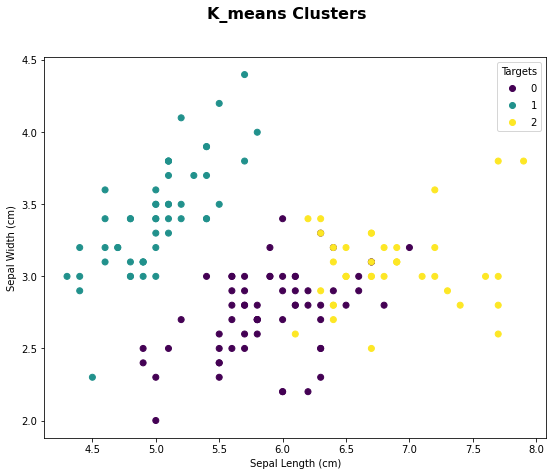

In [16]:
fig , ax = plt.subplots( figsize=(9,7) )

scatter = ax.scatter( x = X['SepalLengthCm'] ,
            y = X['SepalWidthCm'] ,
            c = new_labels )

ax.set(xlabel = 'Sepal Length (cm)' ,
       ylabel ='Sepal Width (cm)' )

ax.legend(*scatter.legend_elements(),title='Targets');

fig.suptitle("K_means Clusters",fontsize=16,fontweight='bold');

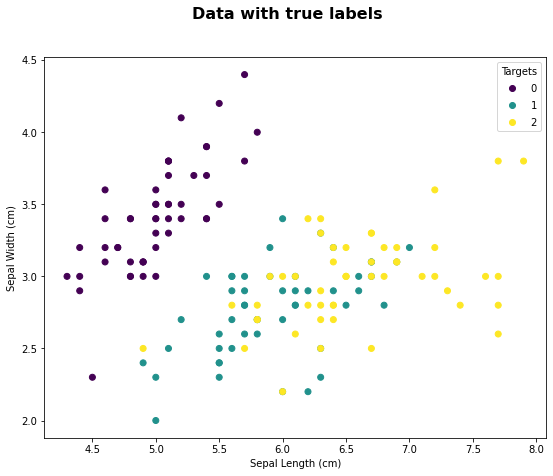

In [23]:
fig , ax = plt.subplots( figsize=(9,7) )

scatter = ax.scatter( x = X['SepalLengthCm'] ,
            y = X['SepalWidthCm'] ,
            c = y )

ax.set(xlabel = 'Sepal Length (cm)' ,
       ylabel ='Sepal Width (cm)' )

ax.legend(*scatter.legend_elements(),title='Targets');

fig.suptitle("Data with true labels",fontsize=16,fontweight='bold');